# Zadanie 2
Celem ćwiczenia jest praktyczne wypróbowanie funkcji numpy.fft i numpy.ifft do wyznaczania prostej i odwrotnej transformaty Fouriera [1, 3]

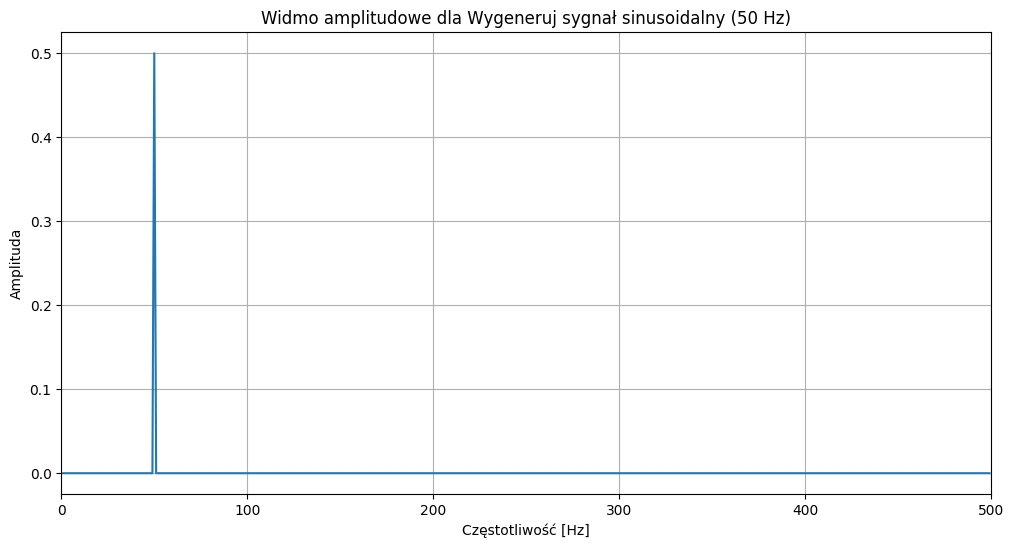

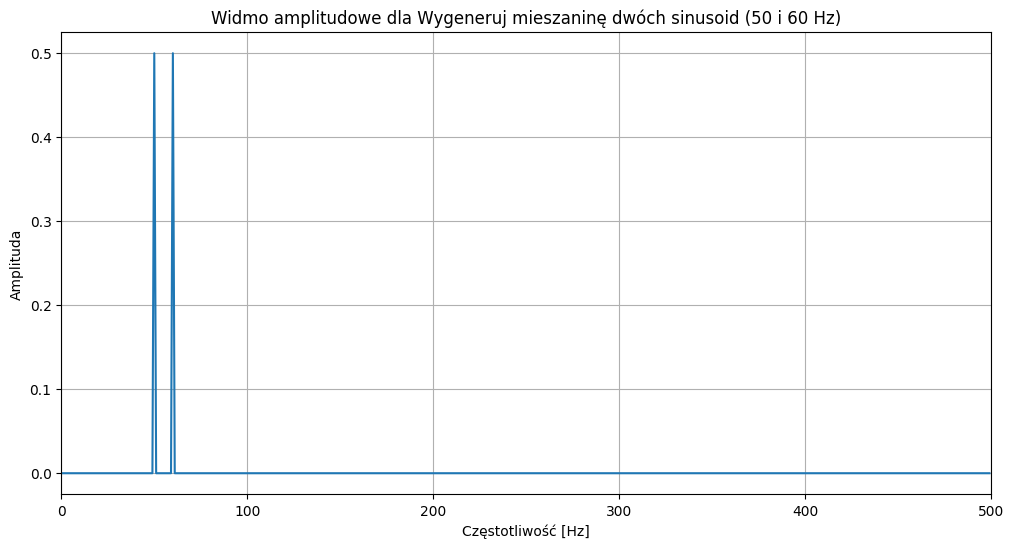

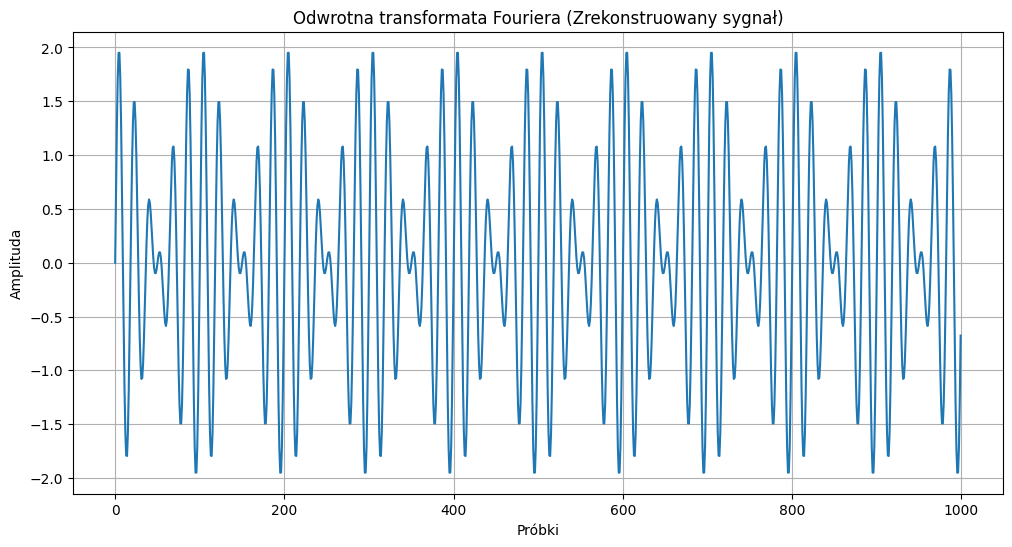

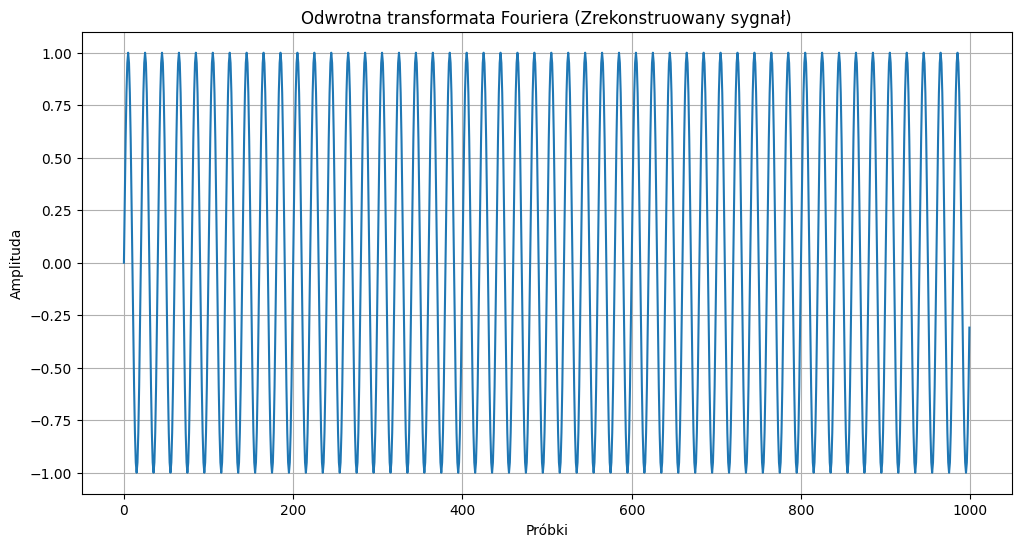

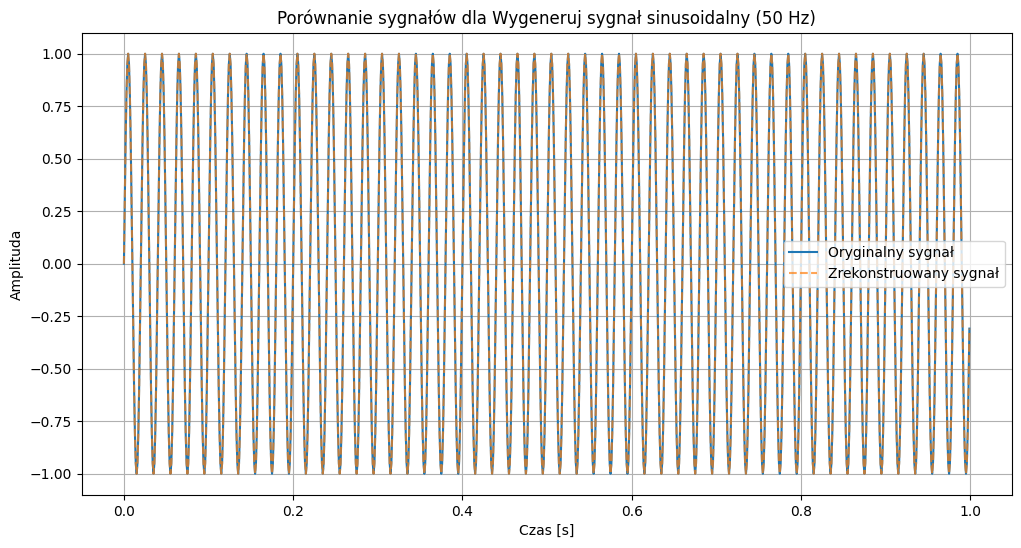

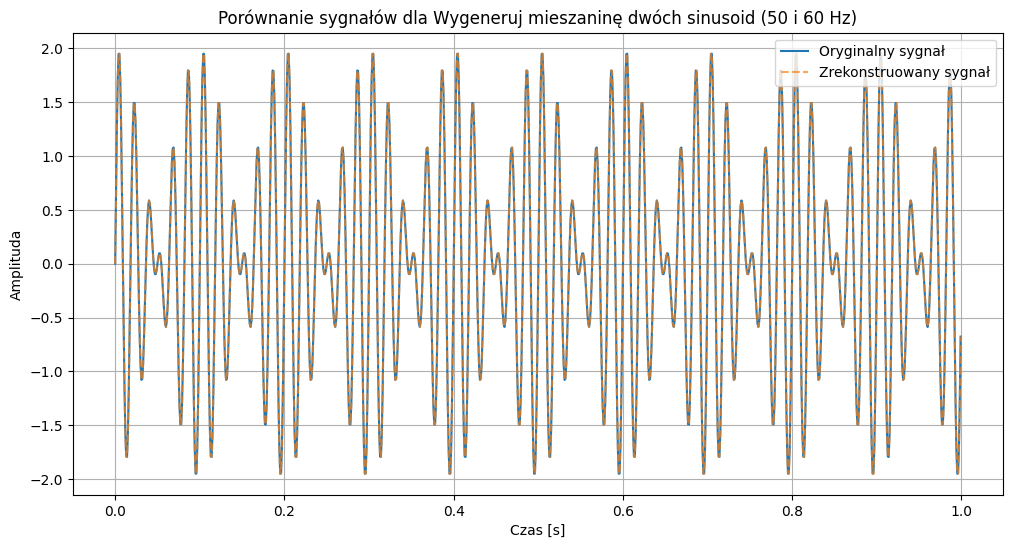

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, Label, Button, OptionMenu, StringVar, Entry


def generate_sine_wave(frequency, duration, sampling_rate, amplitude=1.0):
    num_samples = int(sampling_rate * duration)
    time = np.linspace(0, duration, num_samples, endpoint=False)
    signal = amplitude * np.sin(2 * np.pi * frequency * time)
    return time, signal, sampling_rate

def generate_two_sine_waves(freq1, freq2, duration, sampling_rate, amp1=1.0, amp2=1.0):
    num_samples = int(sampling_rate * duration)
    time = np.linspace(0, duration, num_samples, endpoint=False)
    signal = amp1 * np.sin(2 * np.pi * freq1 * time) + amp2 * np.sin(2 * np.pi * freq2 * time)
    return time, signal, sampling_rate


def compute_and_plot_fft(signal, sampling_rate, title="Widmo amplitudowe"):
    N = len(signal)
    freqs = np.fft.fftfreq(N, 1 / sampling_rate)
    fft_values = np.fft.fft(signal)
    fft_magnitude = np.abs(fft_values) / N

    positive_freq_indices = np.where(freqs >= 0)
    freqs_positive = freqs[positive_freq_indices]
    fft_magnitude_positive = fft_magnitude[positive_freq_indices]

    plt.figure(figsize=(12, 6))
    plt.plot(freqs_positive, fft_magnitude_positive)
    plt.title(title)
    plt.xlabel("Częstotliwość [Hz]")
    plt.ylabel("Amplituda")
    plt.grid(True)
    plt.xlim(0, sampling_rate / 2)
    plt.show()

def compute_and_plot_ifft(fft_values, title="Odwrotna transformata Fouriera (Zrekonstruowany sygnał)"):
    reconstructed_signal = np.fft.ifft(fft_values).real

    plt.figure(figsize=(12, 6))
    plot_len = min(len(reconstructed_signal), 1000)
    plt.plot(reconstructed_signal[:plot_len])
    plt.title(title)
    plt.xlabel("Próbki")
    plt.ylabel("Amplituda")
    plt.grid(True)
    plt.show()
    return reconstructed_signal

def compare_signals(original_time, original_signal, reconstructed_signal, title="Porównanie sygnałów"):
    plt.figure(figsize=(12, 6))

    plot_len = min(len(original_signal), 1000)
    plt.plot(original_time[:plot_len], original_signal[:plot_len], label="Oryginalny sygnał")
    plt.plot(original_time[:plot_len], reconstructed_signal[:plot_len], label="Zrekonstruowany sygnał", linestyle="dashed", alpha=0.7)
    plt.title(title)
    plt.xlabel("Czas [s]")
    plt.ylabel("Amplituda")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_original_signal(time, signal, title="Oryginalny sygnał"):
    plt.figure(figsize=(12, 6))
    plot_len = min(len(signal), 1000)
    plt.plot(time[:plot_len], signal[:plot_len])
    plt.title(title)
    plt.xlabel("Czas [s]")
    plt.ylabel("Amplituda")
    plt.grid(True)
    plt.show()


def analyze_generated_signal():
    signal_type = signal_type_var_gen.get()

    time = None
    signal = None
    sampling_rate = None

    if signal_type == "Wygeneruj sygnał sinusoidalny (50 Hz)":
        try:
            duration = float(duration_entry.get())
            sampling_rate = float(sampling_rate_entry.get())
            time, signal, _ = generate_sine_wave(50, duration, sampling_rate)
            N = 65536 
            if len(signal) > N:
                signal = signal[:N]
                time = time[:N]
            elif len(signal) < N:
                print(f"Warning: Generated signal is shorter than {N} samples. Using {len(signal)} samples.")
        except ValueError:
            print("Błąd: Wprowadź poprawne wartości dla czasu trwania i częstotliwości próbkowania.")
            return

    elif signal_type == "Wygeneruj mieszaninę dwóch sinusoid (50 i 60 Hz)":
        try:
            duration = float(duration_entry.get())
            sampling_rate = float(sampling_rate_entry.get())
            time, signal, _ = generate_two_sine_waves(50, 60, duration, sampling_rate)
        except ValueError:
            print("Błąd: Wprowadź poprawne wartości dla czasu trwania i częstotliwości próbkowania.")
            return
    
    if signal is None or sampling_rate is None:
        print("Nie wybrano sygnału lub nie udało się wygenerować sygnału.")
        return

    plot_original_signal(time, signal, title=f"Oryginalny sygnał: {signal_type}")
    compute_and_plot_fft(signal, sampling_rate, title=f"Widmo amplitudowe dla {signal_type}")
    fft_values = np.fft.fft(signal)
    reconstructed_signal = compute_and_plot_ifft(fft_values, title=f"Odwrotna FFT dla {signal_type}")
    compare_signals(time, signal, reconstructed_signal, title=f"Porównanie sygnałów dla {signal_type}")

def analyze_loaded_signal():
    signal_type = signal_type_var_load.get()

    time = None
    signal = None
    sampling_rate = None

    if signal_type == "ekg_noise.txt":
        time, signal = load_signal("ekg_noise.txt")
        sampling_rate = 1000 
    elif signal_type == "ekg1.txt":
        time, signal = load_signal("ekg1.txt")
        sampling_rate = 1000 
    elif signal_type == "ekg100.txt":
        time, signal = load_signal("ekg100.txt")
        sampling_rate = 360 

    if signal is None or sampling_rate is None:
        print("Nie wybrano sygnału lub nie udało się wczytać sygnału.")
        return

    plot_original_signal(time, signal, title=f"Oryginalny sygnał: {signal_type}")
    compute_and_plot_fft(signal, sampling_rate, title=f"Widmo amplitudowe dla {signal_type}")
    fft_values = np.fft.fft(signal)
    reconstructed_signal = compute_and_plot_ifft(fft_values, title=f"Odwrotna FFT dla {signal_type}")
    compare_signals(time, signal, reconstructed_signal, title=f"Porównanie sygnałów dla {signal_type}")

def load_signal(file_name):
    try:
        data = np.loadtxt(f'sygnaly-testowe/{file_name}')
    except IOError:
        print(f"Błąd: Plik '{file_name}' nie znaleziony w folderze 'sygnaly-testowe/'. Upewnij się, że pliki istnieją.")
        return None, None

    if file_name == "ekg_noise.txt":
        time = data[:, 0]
        signal = data[:, 1]
    else:
        signal = data
        sampling_rate = 360 if file_name == "ekg100.txt" else 1000
        time = np.linspace(0, len(signal) / sampling_rate, len(signal), endpoint=False)
    return time, signal


root = Tk()
root.title("Analiza sygnałów - Ćwiczenie 2 + Pliki")

Label(root, text="Sygnały generowane", font=("Arial", 12, "bold")).grid(row=0, column=0, columnspan=3, pady=10)

Label(root, text="Wybierz typ sygnału:").grid(row=1, column=0, padx=10, pady=5, sticky="w")
signal_type_var_gen = StringVar(root)
signal_type_var_gen.set("Wygeneruj sygnał sinusoidalny (50 Hz)")
signal_type_menu_gen = OptionMenu(root, signal_type_var_gen,
                                  "Wygeneruj sygnał sinusoidalny (50 Hz)",
                                  "Wygeneruj mieszaninę dwóch sinusoid (50 i 60 Hz)")
signal_type_menu_gen.grid(row=1, column=1, columnspan=2, padx=10, pady=5, sticky="ew")

Label(root, text="Czas trwania sygnału (s):").grid(row=2, column=0, padx=10, pady=5, sticky="w")
duration_entry = Entry(root)
duration_entry.insert(0, "1")
duration_entry.grid(row=2, column=1, padx=10, pady=5, sticky="ew")

Label(root, text="Częstotliwość próbkowania (Hz):").grid(row=3, column=0, padx=10, pady=5, sticky="w")
sampling_rate_entry = Entry(root)
sampling_rate_entry.insert(0, "1000") 
sampling_rate_entry.grid(row=3, column=1, padx=10, pady=5, sticky="ew")

Button(root, text="Analizuj generowany sygnał (pełna analiza)", command=analyze_generated_signal).grid(row=4, column=0, columnspan=3, pady=20)

Label(root, text="---", font=("Arial", 12, "bold")).grid(row=5, column=0, columnspan=3, pady=10)

Label(root, text="Sygnały z plików", font=("Arial", 12, "bold")).grid(row=6, column=0, columnspan=3, pady=10)

Label(root, text="Wybierz plik sygnału:").grid(row=7, column=0, padx=10, pady=5, sticky="w")
signal_type_var_load = StringVar(root)
signal_type_var_load.set("ekg_noise.txt")
signal_type_menu_load = OptionMenu(root, signal_type_var_load,
                                   "ekg_noise.txt",
                                   "ekg1.txt",
                                   "ekg100.txt")
signal_type_menu_load.grid(row=7, column=1, columnspan=2, padx=10, pady=5, sticky="ew")

Button(root, text="Analizuj sygnał z pliku (pełna analiza)", command=analyze_loaded_signal).grid(row=8, column=0, columnspan=3, pady=20)

root.mainloop()